# 김가네 팀플 (5) 머신러닝 - 랜덤포레스트_ 230622
- 팀원 별로 분담해서 분석 진행

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.set_option('mode.chained_assignment',  None)

In [ ]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('../data/CS.csv', encoding='euc-kr')
CS.info()
CS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       20624 non-null  int64
 1   where_cnt      20624 non-null  int64
 2   attend_cnt     20624 non-null  int64
 3   volunteer_cnt  20624 non-null  int64
 4   history_cnt    20624 non-null  int64
 5   festival_cnt   20624 non-null  int64
 6   standard       20624 non-null  int64
 7   block          20624 non-null  int64
 8   expense        20624 non-null  int64
 9   expense_f      20624 non-null  int64
 10  difficulty     20624 non-null  int64
 11  intention      20624 non-null  int64
 12  history        20624 non-null  int64
 13  history_f      20624 non-null  int64
 14  festival       20624 non-null  int64
 15  festival_f     20624 non-null  int64
 16  sex            20624 non-null  int64
 17  age            20624 non-null  int64
 18  education      20624 non-null  int64
 19  marr

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


## 데이터 전처리
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링

### 코드 기준 축소
- expense열과 expense_f열 카테고리가 너무 많은 것을 우려,  
- 같은 분야별로 코드 기준 축소

### 연속형 종속변수 범주형으로 변경
- view_cnt 열을 범주형으로 변경하여 진행

---

## 랜덤포레스트 분류 분석을 위해 추가 전처리
- 위의 전처리 과정은 군집화를 할 때 해줬던 전처리 과정과 동일
- 머신러닝 학습을 위해 문자열데이터는 다시 숫자로 레이블링 진행
- expense열과 expense_f열은 다시 코드 변경 함수 실행
- view_cnt 열은 pd.cut()이용하여 카테고리화 진행할 때 labels를 문자가 아니라 숫자로 변경

In [ ]:
# 랜덤포레스트를 위한 데이터프레임 추출
CS_rf = CS.copy()
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


### 비용 지출 관련 2개 열 코드 기준 축소
- expense : 과거에 지출했던 문화예술행사 분야
- expense_f : 미래에 지출할 의향이 있는 분야

### 변경된 카테고리 info
- 1 : '문학/미술'
- 2 : '서양음악'
- 3 : '전통예술'
- 4 : '연극/뮤지컬'
- 5 : '무용'
- 6 : '영화'
- 7 : '대중음악'
- 8 : '기타'
- 9 : '해당사항없음'


In [ ]:
# 축소 전 코드 기준
expense_words = {
    1:'문학',
    2:'미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'전시회',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [ ]:
# 바꿀 코드 기준
expense_newctg = {
    1:'문학/미술',
    2:'문학/미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'문학/미술',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [ ]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [ ]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_rf[column].value_counts(ascending=False)

expense
14    5771
17    5233
12    4786
5     1081
15     747
1      706
8      560
7      511
11     248
9      238
13     201
16     189
2       89
10      87
6       67
4       65
3       45
Name: count, dtype: int64

expense_f
12    5837
14    4724
15    2161
17    1801
1      876
5      780
9      745
11     740
13     687
8      570
16     459
7      440
10     297
6      166
4      135
2      129
3       77
Name: count, dtype: int64

In [ ]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg, expense_newctg]

In [ ]:
# 코드 변경 함수 선언
def get_list_setting_column(column, setting_prev_next):
    setting_done_list = []

    for code_value in column:
        setting_done_list.append(setting_prev_next[code_value])

    return setting_done_list

In [ ]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_rf[column] = get_list_setting_column(CS_rf[column], setting_codes[i])

In [ ]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_rf[column].value_counts(ascending=False)

expense
영화        6282
연극/뮤지컬    5867
해당사항없음    5233
대중음악      1307
문학/미술     1033
전통예술       313
무용         268
기타         189
서양음악       132
Name: count, dtype: int64

expense_f
연극/뮤지컬    6617
영화        5164
대중음악      2731
해당사항없음    1801
문학/미술     1750
전통예술       875
무용         853
기타         459
서양음악       374
Name: count, dtype: int64

### 머신러닝 학습을 위해 문자형 기준을 다시 수치형으로 변경!!
- '문학/미술' : 1
- '서양음악' : 2
- '전통예술' : 3
- '연극/뮤지컬' : 4
- '무용' : 5
- '영화' : 6
- '대중음악' : 7
- '기타' : 8
- '해당사항없음' : 9

In [ ]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [ ]:
# 다시 수치형으로 바꿀 코드 기준
expense_newctg_final = {
    '문학/미술' : 1,
    '서양음악' : 2,
    '전통예술' : 3,
    '연극/뮤지컬' : 4,
    '무용' : 5,
    '영화' : 6,
    '대중음악' : 7,
    '기타' : 8,
    '해당사항없음' : 9
}

In [ ]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg_final, expense_newctg_final]

In [ ]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_rf[column] = get_list_setting_column(CS_rf[column], setting_codes[i])

In [ ]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_rf[column].value_counts(ascending=False)

expense
6    6282
4    5867
9    5233
7    1307
1    1033
3     313
5     268
8     189
2     132
Name: count, dtype: int64

expense_f
4    6617
6    5164
7    2731
9    1801
1    1750
3     875
5     853
8     459
2     374
Name: count, dtype: int64

In [ ]:
# 범주 축소 완료된 데이터프레임 확인
CS_rf

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,6,6,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,6,1,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,7,7,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,6,6,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,6,6,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,4,4,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,4,4,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,9,4,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,4,4,...,1,6,2,4,4,2,5,5,1,1


### view_cnt 종속변수 연속형 ---> 범주형 데이터로 변경
- pd.cut() 함수 이용

### 범주 bins 기준
- 0 : 0회
- 5 : 1~5회
- 10 : 6~10회
- 15 : 11~15회
- 20 : 16~20회
- 30 : 21~30회
- 50 : 31~50회
- 730 : 51회이상

### 머신러닝 학습을 위해 문자형 기준을 다시 수치형으로 변경!!

- 0회 : 1
- 1~5회 : 2
- 6~10회 : 3
- 11~15회 : 4
- 16~20회 : 5
- 21~30회 : 6
- 31~50회 : 7
- 51회이상 : 8

<Axes: xlabel='view_cnt', ylabel='Count'>

(0.0, 50.0)

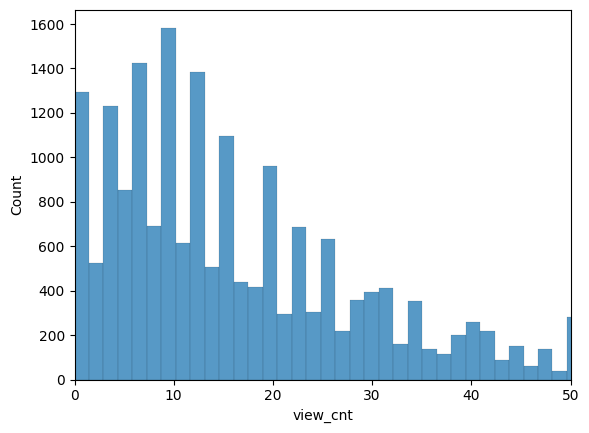

In [ ]:
# 변경 전 view_cnt 분포 시각화

sns.histplot(CS_rf['view_cnt'], bins=500)
plt.xlim(0, 50)

In [ ]:
# view_cnt 의 최댓값
CS_rf['view_cnt'].max()  # 730

# view_cnt의 30 초과 50 이하의 갯수
((CS_rf['view_cnt'] > 30) & (CS_rf['view_cnt'] <= 50)).sum()

# view_cnt의 50개 초과의 갯수
(CS_rf['view_cnt'] > 50).sum()

730

2539

2178

In [ ]:
# cut() 이용해서 데이터 범주화 진행

# 카테고리를 나누는 기준 설정 : 구간 경계값
bins = [0, 5, 10, 15, 20, 30, 50, 730]

# 각 구간의 이름 : labels (카테고리명)
# 주의! : 순서는 구간(bins)의 순서와 동일해야 함
labels = [2, 3, 4, 5, 6, 7, 8]

In [ ]:
# cut() 함수 : cut(data, bins, labels)
view_cnt_ctgs = pd.cut(CS_rf['view_cnt'], bins=bins, labels=labels)
view_cnt_ctgs

0        7
1        2
2        3
3        6
4        5
        ..
20619    8
20620    7
20621    2
20622    8
20623    7
Name: view_cnt, Length: 20624, dtype: category
Categories (7, int64): [2 < 3 < 4 < 5 < 6 < 7 < 8]

In [ ]:
view_cnt_ctgs_df = pd.DataFrame({'view_cnt' : CS_rf['view_cnt'],
                                'view_cnt_ctgs' : list(view_cnt_ctgs)})
view_cnt_ctgs_df

,view_cnt,view_cnt_ctgs
0,49,7.0
1,3,2.0
2,6,3.0
3,22,6.0
4,16,5.0
...,...,...
20619,59,8.0
20620,49,7.0
20621,4,2.0
20622,58,8.0


In [ ]:
view_cnt_ctgs_df['view_cnt_ctgs'].value_counts()

view_cnt_ctgs
3.0    3700
4.0    3139
6.0    2885
2.0    2874
7.0    2539
5.0    2282
8.0    2178
Name: count, dtype: int64

In [ ]:
# 변경해준 범주형 데이터에 결측값 있는지 확인
view_cnt_ctgs_df['view_cnt'].isnull().sum()
view_cnt_ctgs_df['view_cnt_ctgs'].isnull().sum()

0

1027

In [ ]:
# view_cnt_ctgs에 결측값이 있는 행 확인
view_cnt_ctgs_df[view_cnt_ctgs_df['view_cnt_ctgs'].isnull()]

,view_cnt,view_cnt_ctgs
91,0,NaN
93,0,NaN
123,0,NaN
124,0,NaN
125,0,NaN
...,...,...
20532,0,NaN
20578,0,NaN
20580,0,NaN
20584,0,NaN


In [ ]:
# cut 함수로 카테고리화 할 때 0에 해당하는 값은 결측값으로 처리된 것을 확인
# 결측값은 '0회'로 대체
view_cnt_ctgs_df['view_cnt_ctgs'] = view_cnt_ctgs_df['view_cnt_ctgs'].fillna(1)

# 결측값 있는지 다시 확인
view_cnt_ctgs_df['view_cnt_ctgs'].isnull().sum()

0

In [ ]:
# view_cnt가 0에 해당하는 값들의 범주가 '0회'로 잘 들어갔는지 다시 확인
view_cnt_ctgs_df[view_cnt_ctgs_df['view_cnt'] == 0]

,view_cnt,view_cnt_ctgs
91,0,1.0
93,0,1.0
123,0,1.0
124,0,1.0
125,0,1.0
...,...,...
20532,0,1.0
20578,0,1.0
20580,0,1.0
20584,0,1.0


In [ ]:
# CS_rf 데이터프레임에 view_cnt_ctgs 열 추가
CS_rf['view_cnt_ctgs'] = view_cnt_ctgs_df['view_cnt_ctgs']

# CS_rf 데이터프레임에 기존 view_cnt 열 drop
CS_rf.drop('view_cnt', axis=1, inplace=True)

In [ ]:
# CS_clustering 데이터프레임 확인
CS_rf.head()

# float -> int 변환
CS_rf = CS_rf.astype(int)

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,festival_f,sex,age,education,married,work,income,sido,disabled,view_cnt_ctgs
0,0,0,0,5,0,1,1,6,6,3,...,6,2,5,3,1,5,3,1,1,7.0
1,3,3,0,1,0,2,6,6,1,1,...,7,2,5,3,2,5,7,1,1,2.0
2,0,0,0,0,0,2,1,7,7,1,...,4,1,2,3,1,5,6,1,1,3.0
3,12,2,0,0,0,1,2,6,6,4,...,5,2,4,4,2,5,5,1,1,6.0
4,3,2,0,2,0,2,1,6,6,4,...,4,2,3,4,1,1,3,1,1,5.0


In [ ]:
# 데이터 타입 전부 정수로 바꼈는지 다시 한번 확인 + Null값 없음 확인
CS_rf.info()

# view_cnt_ctgs 카테고리별 빈도 확인
CS_rf['view_cnt_ctgs'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   where_cnt      20624 non-null  int64
 1   attend_cnt     20624 non-null  int64
 2   volunteer_cnt  20624 non-null  int64
 3   history_cnt    20624 non-null  int64
 4   festival_cnt   20624 non-null  int64
 5   standard       20624 non-null  int64
 6   block          20624 non-null  int64
 7   expense        20624 non-null  int64
 8   expense_f      20624 non-null  int64
 9   difficulty     20624 non-null  int64
 10  intention      20624 non-null  int64
 11  history        20624 non-null  int64
 12  history_f      20624 non-null  int64
 13  festival       20624 non-null  int64
 14  festival_f     20624 non-null  int64
 15  sex            20624 non-null  int64
 16  age            20624 non-null  int64
 17  education      20624 non-null  int64
 18  married        20624 non-null  int64
 19  work

view_cnt_ctgs
3    3700
4    3139
6    2885
2    2874
7    2539
5    2282
8    2178
1    1027
Name: count, dtype: int64

### 기타 전처리 진행
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링

In [ ]:
# 연령대 50, 60대만 포함
CS_rf = CS_rf[(CS_rf['age'] == 5) | (CS_rf['age'] == 6)]

In [ ]:
# 시도 서울, 경기만 포함
CS_rf = CS_rf[(CS_rf['sido'] == 1) | (CS_rf['sido'] == 9)]

### 머신러닝 학습 전 최종 전처리 완료된 데이터프레임 확인
- 데이터 개수 :  2144

In [ ]:
CS_rf

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,festival_f,sex,age,education,married,work,income,sido,disabled,view_cnt_ctgs
0,0,0,0,5,0,1,1,6,6,3,...,6,2,5,3,1,5,3,1,1,7
1,3,3,0,1,0,2,6,6,1,1,...,7,2,5,3,2,5,7,1,1,2
6,15,0,0,0,0,2,2,6,6,5,...,5,2,5,4,3,1,5,1,1,6
7,0,0,0,2,2,2,4,9,3,2,...,6,1,5,4,2,1,6,1,1,3
9,0,0,0,0,0,3,2,7,4,2,...,5,2,5,3,2,1,5,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0,0,0,0,0,5,4,4,4,1,...,5,1,5,4,2,1,3,9,1,6
20599,0,0,0,1,0,1,1,9,4,1,...,5,2,5,3,2,1,6,9,1,6
20605,1,0,0,1,0,4,1,7,7,2,...,4,2,6,2,2,3,4,9,1,6
20618,2,0,0,4,0,1,2,8,8,2,...,5,2,5,3,2,3,6,1,1,3


---

## 랜덤포레스트 학습 및 예측 진행
1. train_test_split 이용해서 train 데이터와 test 데이터 나누기
2. 의사결정나무(결정트리) 먼저 사용해서 모델 성능(정확도) 확인
3. 랜덤포레스트 사용해서 모델 성능(정확도)확인

In [ ]:
# 피처 데이터 세트 / 타겟 데이터 세트 만들기
CS_X_df = CS_rf.drop('view_cnt_ctgs', axis=1)
CS_y_df = CS_rf['view_cnt_ctgs']

# 피쳐 데이터 세트 / 타겟 데이터 세트 확인
CS_X_df
CS_y_df

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,0,0,0,5,0,1,1,6,6,3,...,2,6,2,5,3,1,5,3,1,1
1,3,3,0,1,0,2,6,6,1,1,...,2,7,2,5,3,2,5,7,1,1
6,15,0,0,0,0,2,2,6,6,5,...,2,5,2,5,4,3,1,5,1,1
7,0,0,0,2,2,2,4,9,3,2,...,1,6,1,5,4,2,1,6,1,1
9,0,0,0,0,0,3,2,7,4,2,...,2,5,2,5,3,2,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0,0,0,0,0,5,4,4,4,1,...,2,5,1,5,4,2,1,3,9,1
20599,0,0,0,1,0,1,1,9,4,1,...,2,5,2,5,3,2,1,6,9,1
20605,1,0,0,1,0,4,1,7,7,2,...,2,4,2,6,2,2,3,4,9,1
20618,2,0,0,4,0,1,2,8,8,2,...,2,5,2,5,3,2,3,6,1,1


0        7
1        2
6        6
7        3
9        3
        ..
20595    6
20599    6
20605    6
20618    3
20621    2
Name: view_cnt_ctgs, Length: 2144, dtype: int64

In [ ]:
# 학습 / 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CS_X_df,
                                                   CS_y_df,
                                                   test_size=0.3,
                                                   random_state=11)

In [ ]:
# 의사결정나무(결정트리) 알고리즘 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

DecisionTreeClassifier(random_state=11)

결정 트리 예측 정확도 : 0.1910


In [ ]:
# 랜덤포레스트 알고리즘 사용
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, n_estimators=300)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('랜덤 포레스트 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(n_estimators=300, random_state=0)

랜덤 포레스트 예측 정확도 : 0.2547


In [ ]:
CS_y_df.value_counts(ascending=False)

view_cnt_ctgs
3    452
2    419
4    338
6    246
5    219
7    177
8    156
1    137
Name: count, dtype: int64

## 결과 --> 현재 정확도가 25% 정도로 모델의 성능이 좋지 않다..!

### 모델 성능 향상을 위해 해볼 수 있는 것
1. 하이퍼 파라미터
2. 데이터 개수 늘려보기
3. 범주 개수 줄여보기
4. 연속형 범주 스케일링 및 로그 변환

---
# 전처리 기준 바꿔서 머신러닝 재시도!!
---
## 하이퍼 파라미터 튜닝

In [ ]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'max_depth' : [6, 8, 10],
    'min_samples_split' : [6, 8, 10],
    'min_samples_leaf' : [6, 8, 10]
}

grid_rclf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)

grid_rclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : ', grid_rclf.best_params_)
print('최적 하이퍼 파라미터의 최고 정확도 : {0:.4f}'.format(grid_rclf.best_score_))

best_rclf = grid_rclf.best_estimator_

y_pred = best_rclf.predict(X_test)

print('튜닝 후 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, random_state=0),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 300}
최적 하이퍼 파라미터의 최고 정확도 : 0.2553
튜닝 후 정확도 : 0.2748


In [ ]:
# 파라미터가 아래와 같을 때 튜닝 결과 (1)

# params = {
#     'n_estimators' : [100, 200, 300, 400],
#     'max_depth' : [5,6,7],
#     'min_samples_split' : [4,5,6],
#     'min_samples_leaf' : [2,3,4]
# }

# 최적 하이퍼 파라미터 :  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.2580
# 튜닝 후 정확도 : 0.2531

In [ ]:
# 파라미터가 아래와 같을 때 튜닝 결과 (2)

# params = {
#     'n_estimators' : [100, 300],
#     'max_depth' : [6, 8, 10],
#     'min_samples_split' : [6, 8, 10],
#     'min_samples_leaf' : [6, 8, 10]
# }

# 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 300}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.2507
# 튜닝 후 정확도 : 0.2655

#### 튜닝된 하이퍼 파라미터로 다시 학습/예측/평가 수행

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=300,
                                max_depth=8,
                               min_samples_leaf=8,
                               min_samples_split=6,
                                random_state=0)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('최적 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=6,
                       n_estimators=300, random_state=0)

최적 정확도 : 0.2733


### 개별 feature들의 중요도 시각화

<Axes: >

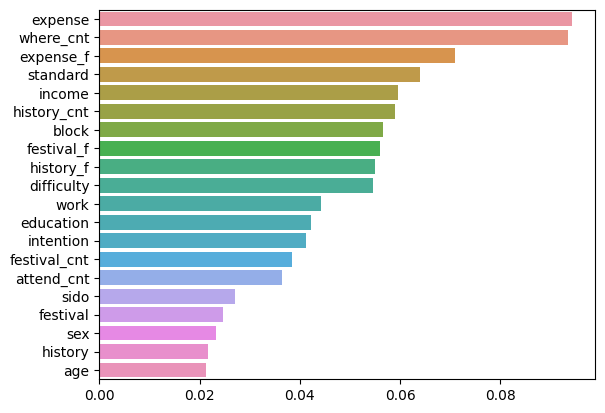

In [ ]:
# 피처 중요도가 높은 20개의 피처만
f_imp = rf_clf.feature_importances_
feature_importances = pd.Series(f_imp, index=X_train.columns).sort_values(ascending=False)
feature_importances = feature_importances[:20]

sns.barplot(x=feature_importances, y=feature_importances.index)

## 데이터 개수 늘려서 다시 학습 수행
- 서울특별시와 경기도(수도권)으로 필터링 했던 거를 전국으로 확대
- 시니어(5,60)대는 일단 그대로 진행.

#### 위의 [기타 전처리] 코드 다시 실행하고 오기..!

In [ ]:
# 수도권(서울, 경기) ---> 전국으로 확대한 데이터프레임
CS_rf

# 데이터 행 개수 6727개

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,festival_f,sex,age,education,married,work,income,sido,disabled,view_cnt_ctgs
0,0,0,0,5,0,1,1,6,6,3,...,6,2,5,3,1,5,3,1,1,7
1,3,3,0,1,0,2,6,6,1,1,...,7,2,5,3,2,5,7,1,1,2
6,15,0,0,0,0,2,2,6,6,5,...,5,2,5,4,3,1,5,1,1,6
7,0,0,0,2,2,2,4,9,3,2,...,6,1,5,4,2,1,6,1,1,3
9,0,0,0,0,0,3,2,7,4,2,...,5,2,5,3,2,1,5,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0,0,0,0,0,5,4,4,4,1,...,5,1,5,4,2,1,3,9,1,6
20599,0,0,0,1,0,1,1,9,4,1,...,5,2,5,3,2,1,6,9,1,6
20605,1,0,0,1,0,4,1,7,7,2,...,4,2,6,2,2,3,4,9,1,6
20618,2,0,0,4,0,1,2,8,8,2,...,5,2,5,3,2,3,6,1,1,3


In [ ]:
# 전국 데이터로 랜덤포레스트 실행 결과

# RandomForestClassifier
# RandomForestClassifier(n_estimators=300, random_state=0)
# 랜덤 포레스트 예측 정확도 : 0.2546

In [ ]:
# 전국 데이터로 하이퍼 파라미터 튜닝 결과

# 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 100}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.2506
# 튜닝 후 정확도 : 0.2620

In [ ]:
# 튜닝된 하이퍼 파라미터로 다시 학습/예측/평가 수행

# 최적 정확도 : 0.2590

In [ ]:
# 전국으로 확대해도 모델 성능에는 큰 차이가 없으므로 가설 기각

---
## Target 데이터 범주 축소 : 8개 --> 3개
- 타겟 범주 기준 통일
- [상, 중, 하] 총 3개의 카테고리로 관람횟수(참여도) 범주 분리
- 참여도(하) : 최솟값 ~ 제 1 사분위수
- 참여도(중) : 제 1 사분위수 ~ 평균
- 참여도(상) : 평균 ~ 최댓값

<Axes: xlabel='view_cnt_ctgs', ylabel='Count'>

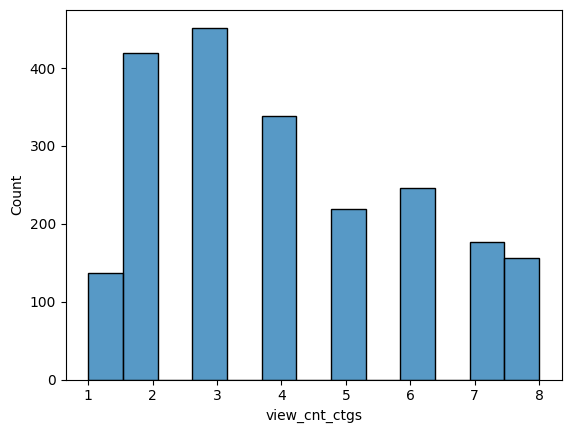

In [ ]:
# 범주 축소 전 현재 타겟 데이터의 분포 시각화
sns.histplot(CS_y_df)

In [ ]:
# 기존 데이터에 대한 기초통계량 출력
CS['view_cnt'].describe()

count    20624.000000
mean        25.158505
std         37.865832
min          0.000000
25%          7.000000
50%         15.000000
75%         29.000000
max        730.000000
Name: view_cnt, dtype: float64

In [ ]:
# target 범주화
target_min = min(CS['view_cnt'])
target_max = max(CS['view_cnt'])

target_ranges = [target_min-1, 7, 25, target_max]
labels = [1, 2, 3]
CS_rf['target'] = pd.cut(CS['view_cnt'], bins=target_ranges, labels=labels)

In [ ]:
# 범주화 확인
CS_rf['target'].value_counts().sort_index()

target
1    743
2    967
3    434
Name: count, dtype: int64

### train, test 데이터 분리
### 분리 전 'sido', 'age' 열 삭제!!

In [ ]:
# 분리 전 데이터프레임 확인
CS_rf

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,sex,age,education,married,work,income,sido,disabled,view_cnt_ctgs,target
0,0,0,0,5,0,1,1,6,6,3,...,2,5,3,1,5,3,1,1,7,3
1,3,3,0,1,0,2,6,6,1,1,...,2,5,3,2,5,7,1,1,2,1
6,15,0,0,0,0,2,2,6,6,5,...,2,5,4,3,1,5,1,1,6,2
7,0,0,0,2,2,2,4,9,3,2,...,1,5,4,2,1,6,1,1,3,2
9,0,0,0,0,0,3,2,7,4,2,...,2,5,3,2,1,5,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0,0,0,0,0,5,4,4,4,1,...,1,5,4,2,1,3,9,1,6,2
20599,0,0,0,1,0,1,1,9,4,1,...,2,5,3,2,1,6,9,1,6,2
20605,1,0,0,1,0,4,1,7,7,2,...,2,6,2,2,3,4,9,1,6,3
20618,2,0,0,4,0,1,2,8,8,2,...,2,5,3,2,3,6,1,1,3,1


In [ ]:
# 피처 데이터 세트 / 타겟 데이터 세트 만들기
CS_X_df = CS_rf.drop(columns=['view_cnt_ctgs', 'target', 'sido', 'age'], axis=1)
CS_y_df = CS_rf['target']

# 피쳐 데이터 세트 / 타겟 데이터 세트 확인
CS_X_df
CS_y_df

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,difficulty,...,history,history_f,festival,festival_f,sex,education,married,work,income,disabled
0,0,0,0,5,0,1,1,6,6,3,...,1,6,2,6,2,3,1,5,3,1
1,3,3,0,1,0,2,6,6,1,1,...,1,7,2,7,2,3,2,5,7,1
6,15,0,0,0,0,2,2,6,6,5,...,2,4,2,5,2,4,3,1,5,1
7,0,0,0,2,2,2,4,9,3,2,...,1,6,1,6,1,4,2,1,6,1
9,0,0,0,0,0,3,2,7,4,2,...,2,5,2,5,2,3,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0,0,0,0,0,5,4,4,4,1,...,2,5,2,5,1,4,2,1,3,1
20599,0,0,0,1,0,1,1,9,4,1,...,1,4,2,5,2,3,2,1,6,1
20605,1,0,0,1,0,4,1,7,7,2,...,1,5,2,4,2,2,2,3,4,1
20618,2,0,0,4,0,1,2,8,8,2,...,1,6,2,5,2,3,2,3,6,1


0        3
1        1
6        2
7        2
9        1
        ..
20595    2
20599    2
20605    3
20618    1
20621    1
Name: target, Length: 2144, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [ ]:
# 학습 / 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CS_X_df,
                                                   CS_y_df,
                                                   test_size=0.3,
                                                   random_state=11)

In [ ]:
# 랜덤포레스트 알고리즘 사용
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, n_estimators=300)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('랜덤 포레스트 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(n_estimators=300, random_state=0)

랜덤 포레스트 예측 정확도 : 0.5404


### 범주 축소된 모델로 하이퍼 파라미터 튜닝 진행

In [ ]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [5,6,7,8],
    'min_samples_split' : [4,5,6],
    'min_samples_leaf' : [2,3,4]
}

grid_rclf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)

grid_rclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : ', grid_rclf.best_params_)
print('최적 하이퍼 파라미터의 최고 정확도 : {0:.4f}'.format(grid_rclf.best_score_))

best_rclf = grid_rclf.best_estimator_

y_pred = best_rclf.predict(X_test)

print('튜닝 후 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, random_state=0),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
최적 하이퍼 파라미터의 최고 정확도 : 0.5280
튜닝 후 정확도 : 0.5373


In [ ]:
# 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 100}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.5133
# 튜닝 후 정확도 : 0.5450

In [ ]:
# 최적 하이퍼 파라미터 :  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
# 최적 하이퍼 파라미터의 최고 정확도 : 0.5180
# 튜닝 후 정확도 : 0.5466

## 결론
- 하이퍼 파라미터 튜닝을 한 결과가 더 좋지 않다...!

---

### 필요하진 않지만 혹시 몰라서 연속형 feature 스케일링 / 로그 변환
- 확인해본 결과 진짜 필요없었음.
- 정확도가 하기 전이랑 똑같이 나옴.

In [ ]:
# 스케일링
# 추후 log 변환을 위하여
# 정규분포로 스케일링 하지 않고
# min-max 스케일링 실시
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
CS_X_df.iloc[:, :5] = mms.fit_transform(CS_X_df.iloc[:, :5])

# 스케일링 확인
CS_X_df.iloc[:, :5].head(2)

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt
0,0.000000,0.00,0.0,0.10,0.0
1,0.012195,0.03,0.0,0.02,0.0


In [ ]:
# log 변환
CS_X_df.iloc[:, :5] = np.log1p(CS_X_df.iloc[:, :5])

# log 변환 확인
CS_X_df.iloc[:, :5].head(2)

,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt
0,0.000000,0.000000,0.0,0.095310,0.0
1,0.012121,0.029559,0.0,0.019803,0.0


In [ ]:
# 학습 / 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CS_X_df,
                                                   CS_y_df,
                                                   test_size=0.3,
                                                   random_state=11)

In [ ]:
# 랜덤포레스트 알고리즘 사용
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, n_estimators=300)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('랜덤 포레스트 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier(n_estimators=300, random_state=0)

랜덤 포레스트 예측 정확도 : 0.5466


### 개별 feature들의 중요도 시각화

<Axes: >

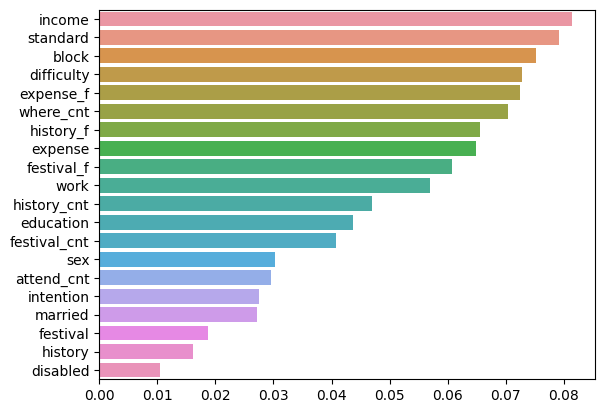

In [ ]:
# 피처 중요도가 높은 20개의 피처만
f_imp = rf_clf.feature_importances_
feature_importances = pd.Series(f_imp, index=X_train.columns).sort_values(ascending=False)
feature_importances = feature_importances[:20]

sns.barplot(x=feature_importances, y=feature_importances.index)

#### 가장 변별력이 높은 feature는 소득(income)이다.

## 예측값 데이터셋에 가공열로 추가

In [ ]:
# 예측값 생성
y_pred = rf_clf.predict(CS_X_df)

In [ ]:
# 저장할 데이터셋 복사
CS_pred = CS.copy()

In [ ]:
CS_pred

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


In [ ]:
# 연령대 50, 60대만 포함
CS_pred = CS_pred[(CS_pred['age'] == 5) | (CS_pred['age'] == 6)]

In [ ]:
# 시도 서울, 경기만 포함
CS_pred = CS_pred[(CS_pred['sido'] == 1) | (CS_pred['sido'] == 9)]

In [ ]:
# 예측값 가공열 생성
CS_pred['pred'] = y_pred

In [ ]:
# 타겟값 가공열 생성
CS_pred['target'] = CS_y_df

In [ ]:
# 머신러닝 완료된 최종 데이터프레임 확인
CS_pred

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,sex,age,education,married,work,income,sido,disabled,pred,target
0,49,0,0,0,5,0,1,1,14,14,...,2,5,3,1,5,3,1,1,3,3
1,3,3,3,0,1,0,2,6,14,9,...,2,5,3,2,5,7,1,1,1,1
6,22,15,0,0,0,0,2,2,14,14,...,2,5,4,3,1,5,1,1,2,2
7,10,0,0,0,2,2,2,4,17,11,...,1,5,4,2,1,6,1,1,2,2
9,7,0,0,0,0,0,3,2,15,12,...,2,5,3,2,1,5,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,21,0,0,0,0,0,5,4,12,12,...,1,5,4,2,1,3,9,1,2,2
20599,23,0,0,0,1,0,1,1,17,12,...,2,5,3,2,1,6,9,1,2,2
20605,30,1,0,0,1,0,4,1,8,8,...,2,6,2,2,3,4,9,1,3,3
20618,7,2,0,0,4,0,1,2,16,16,...,2,5,3,2,3,6,1,1,1,1


In [ ]:
# 파일로 저장
CS_pred.to_csv('CS_pred.csv', index=False)